In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')

%load_ext autoreload
%autoreload 2

# Завдання:
## 1. На основі опитування експерта побудувати матрицю попарних порівнянь елементів нечіткої множини "висока людина" які відповідають росту: $\{170, 175, 180, 185, 190, 195, 200\}$ см, і нечіткої множини "низька людина": $\{150, 155, 160, 165, 170, 175, 180\}$ см. Зокрема, для кожної пари елементів універсальної множини $Х$ оцінити перевагу одного елемента над іншим відносно певної властивості нечіткої множини. Попарні порівняння подати у вигляді матриці $A$, де $а_{ij}$ – рівень переваги елемента $x_i$ над $x_j$, який визначається за дев’ятибальною шкалою.

In [2]:
short = range(150, 181, 5)
tall = range(170, 201, 5)
ratings = list(range(1, 10))

A = np.subtract(*np.meshgrid(tall, short, indexing='ij', sparse=True))
intervals = np.linspace(0, A.max(), len(ratings))
conds = [A <= 0]
conds.extend((A > a) & (A <= b) for a, b in zip(intervals[:-1], intervals[1:]))
A = np.piecewise(A, conds, ratings)

print('Pairwise Comparison Matrix:\n', A)

Pairwise Comparison Matrix:
 [[5 4 3 2 1 1 1]
 [5 5 4 3 2 1 1]
 [6 5 5 4 3 2 1]
 [7 6 5 5 4 3 2]
 [8 7 6 5 5 4 3]
 [9 8 7 6 5 5 4]
 [9 9 8 7 6 5 5]]


## 2. Визначити ступінь приналежності $і$-го елемента до нечіткої множини, який відповідає $і$-й координаті власного вектора матриці парних порівнянь. Ступінь приналежності $і$-го елемента до нечіткої множини наближено можна знайти за допомогою виразу: $$\mu_i = \frac{\sqrt[n]{\prod_{j=1}^n{a_{ij}}}}{\sum_{i=1}^n{\sqrt[n]{\prod_{j=1}^n{a_{ij}}}}}$$

In [3]:
geom_mean = np.prod(A, axis=1) ** (1 / A.shape[0])
mem_func = geom_mean / geom_mean.sum()
mem_func /= mem_func.max()
print('Normalized Membership Function:', mem_func)

Normalized Membership Function: [0.29092018 0.36612274 0.4729238  0.62448133 0.76125127 0.89061132
 1.        ]


## 3. Апроксимувати функцію приналежності однією з $S$-подібних функцій

In [4]:
a, b = 160, 200
x = np.linspace(150, 210, 100)
approx_mem_func = np.piecewise(
    x,
    [x <= a, (x > a) & (x < b), x >= b],
    [0, lambda x: (x - a) / (b - a), 1]
)

## 4. Побудувати графік двох функцій приналежності

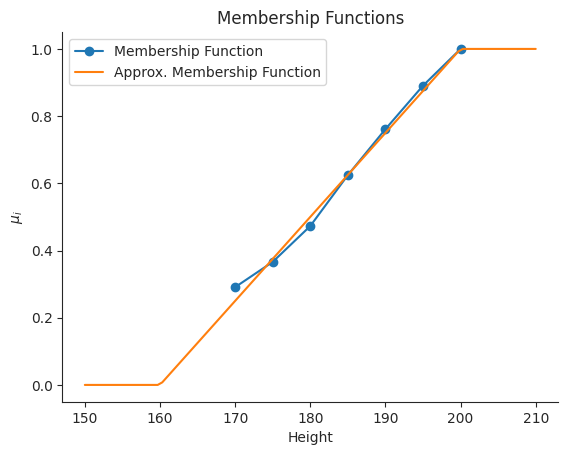

In [5]:
plt.title('Membership Functions')
plt.xlabel('Height')
plt.ylabel('$\mu_i$')
plt.plot(tall, mem_func, '-o', label='Membership Function')
plt.plot(x, approx_mem_func, label='Approx. Membership Function')
plt.legend()
sns.despine()
plt.show()

## 5. Визначити носій нечіткої множини, її ядро та границі

In [6]:
print('Support of A:', x[approx_mem_func > 0])
print('Core of A:', x[approx_mem_func == 1])
print('Bounds of A:', x[(approx_mem_func > 0) & (approx_mem_func < 1)])

Support of A: [160.3030303  160.90909091 161.51515152 162.12121212 162.72727273
 163.33333333 163.93939394 164.54545455 165.15151515 165.75757576
 166.36363636 166.96969697 167.57575758 168.18181818 168.78787879
 169.39393939 170.         170.60606061 171.21212121 171.81818182
 172.42424242 173.03030303 173.63636364 174.24242424 174.84848485
 175.45454545 176.06060606 176.66666667 177.27272727 177.87878788
 178.48484848 179.09090909 179.6969697  180.3030303  180.90909091
 181.51515152 182.12121212 182.72727273 183.33333333 183.93939394
 184.54545455 185.15151515 185.75757576 186.36363636 186.96969697
 187.57575758 188.18181818 188.78787879 189.39393939 190.
 190.60606061 191.21212121 191.81818182 192.42424242 193.03030303
 193.63636364 194.24242424 194.84848485 195.45454545 196.06060606
 196.66666667 197.27272727 197.87878788 198.48484848 199.09090909
 199.6969697  200.3030303  200.90909091 201.51515152 202.12121212
 202.72727273 203.33333333 203.93939394 204.54545455 205.15151515
 205